In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path ="C:\\Users\\USER\\Documents\\IIM I IPBA\\Capstone\\Digitset Cl1"
ls_file = []
for root, dirs, files in os.walk(path):
    for file in files:
        #print(os.path.join(root,file))
        ls_file.append(os.path.join(root,file))

In [3]:
range(len(ls_file))

range(0, 160)

In [4]:
os.chdir("C:\\Users\\USER\\Documents\\IIM I IPBA\\Capstone\\Digitset Cl1")

In [5]:
def get_image(path):
    im=cv2.imread(path)
    im=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    i=im[0:75,:]
    return i

In [6]:
labels = []
images = []

In [7]:
for i in range(len(ls_file)):
    print(ls_file[i])
    if (ls_file[i]!= 'C:\\sers\\USER\\Documents\\IIM I IPBA\\Capstone\\Digitset Cl1\\.DS_Store'):
        images.append(get_image(ls_file[i]))
        labels.append(i)

C:\Users\USER\Documents\IIM I IPBA\Capstone\Digitset Cl1\aodP-trd-00014_D01_2021_06_09-10_23_41_PM.jpg
C:\Users\USER\Documents\IIM I IPBA\Capstone\Digitset Cl1\aodP-trd-00014_D01_2021_06_10-10_57_43_PM.jpg
C:\Users\USER\Documents\IIM I IPBA\Capstone\Digitset Cl1\aodP-trd-00014_D01_2021_06_13-12_42_27_PM.jpg
C:\Users\USER\Documents\IIM I IPBA\Capstone\Digitset Cl1\aodP-trd-00015_D01_2021_06_09-10_25_28_PM.jpg
C:\Users\USER\Documents\IIM I IPBA\Capstone\Digitset Cl1\aodP-trd-00015_D01_2021_06_10-10_59_29_PM.jpg
C:\Users\USER\Documents\IIM I IPBA\Capstone\Digitset Cl1\aodP-trd-00015_D01_2021_06_13-12_43_56_PM.jpg
C:\Users\USER\Documents\IIM I IPBA\Capstone\Digitset Cl1\aodP-trd-00018_D01_2021_06_09-10_30_54_PM.jpg
C:\Users\USER\Documents\IIM I IPBA\Capstone\Digitset Cl1\aodP-trd-00018_D01_2021_06_10-11_04_51_PM.jpg
C:\Users\USER\Documents\IIM I IPBA\Capstone\Digitset Cl1\aodP-trd-00018_D01_2021_06_13-12_48_27_PM.jpg
C:\Users\USER\Documents\IIM I IPBA\Capstone\Digitset Cl1\aodP-trd-00019_D

In [8]:
# arranging the images as a numpy array
x_train=np.array(images)
x_train.shape
# there are 380 images which are 100 pixels long by 90 pixels wide

(160, 75, 50)

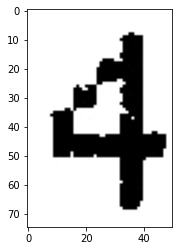

In [9]:
# lets take a look at some of the images
plt.imshow(x_train[75,:],cmap="gray")

In [10]:
# Flattening the image
# Each row will represent one image
pixels = x_train.flatten().reshape(160,3750)
print(pixels.shape)

(160, 3750)


In [11]:
# Model Building
import pandas as pd
from sklearn.cluster import KMeans

In [12]:
# Scaling of data
from sklearn.preprocessing import MinMaxScaler

In [13]:
Scaler = MinMaxScaler()
train = Scaler.fit_transform(pixels)
# we get a matrix of data points which are scaled

In [36]:
# using K means to fit a model
kmeans = KMeans(init='k-means++', n_clusters=7, n_init=10)
np.random.seed(100)
kmeans.fit(train)

KMeans(n_clusters=7)

In [37]:
kmeans.labels_

array([6, 6, 6, 6, 3, 3, 6, 6, 6, 6, 2, 2, 5, 5, 5, 5, 1, 1, 1, 5, 5, 5,
       1, 1, 1, 5, 5, 5, 6, 6, 6, 3, 3, 3, 3, 3, 6, 6, 6, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 4, 4, 2, 4, 4, 2, 4, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4,
       4, 2, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 3, 1, 1])

In [38]:
# create dataframe for storing cluster labels and image ids
image_clusters=pd.DataFrame({'Cluster':kmeans.labels_,"Id":range(0,160)})

In [39]:
image_clusters.head

<bound method NDFrame.head of      Cluster   Id
0          6    0
1          6    1
2          6    2
3          6    3
4          3    4
..       ...  ...
155        6  155
156        6  156
157        3  157
158        1  158
159        1  159

[160 rows x 2 columns]>

In [54]:
# subset data and select images that only belong to subset cluster 0
clust_1=image_clusters[image_clusters.Cluster==7]

In [56]:
# plot all images that have a predicted cluster of 0
for i in clust_1.Id:
    plt.imshow(x_train[i,:],cmap="gray")
    plt.show()
# even with unsupervised learning, we were able to classify among the images